<a href="https://colab.research.google.com/github/faizanindyo/FaizAnd/blob/main/UAS/UAS_Muhammad_Faiz_Anindyo_Widodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : MUHAMMAD FAIZ ANINDYO WIDODO

NIM : 1103213011

Judul : UAS MACHINE LEARNING

Dataset dan Model : MNIST FASHION MODEL CNN

Refrensi : https://github.com/zalandoresearch/fashion-mnist & https://www.youtube.com/watch?v=p_Mcys2Cbik&ab_channel=RidwanIlyas

In [21]:
# Mengimpor library yang diperlukan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Mengimpor dataset Fashion MNIST dari Keras
mnist = tf.keras.datasets.fashion_mnist

# Memuat dataset dan membaginya menjadi set pelatihan dan set pengujian
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
# Menggunakan hanya 150 data pertama dari set pelatihan dan pengujian untuk pelatihan cepat
train_images, train_labels = train_images[:150], train_labels[:150]
test_images, test_labels = test_images[:150], test_labels[:150]

In [24]:
# Menampilkan bentuk data pelatihan dan pengujian
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [11]:
# Mengatur opsi tampilan numpy
np.set_printoptions(linewidth=200)

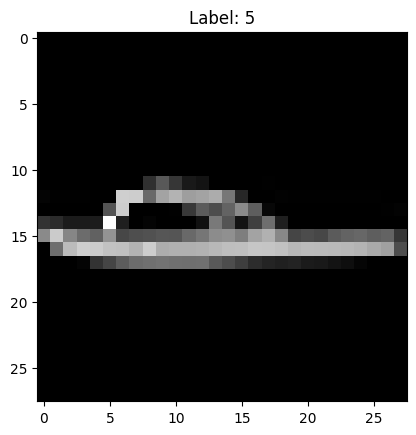

In [14]:
# Menampilkan salah satu gambar dari set pelatihan
index = 30
plt.imshow(train_images[index], cmap='gray')
plt.title(f'Label: {train_labels[index]}')
plt.show()

In [15]:
# Menampilkan nilai piksel gambar pada indeks yang ditentukan
print(f'Label: {train_labels[index]}')
print(train_images[index])


Label: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [26]:
# Preprocessing data: merubah bentuk dan melakukan normalisasi
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

In [27]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [33]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer dengan 32 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer dengan 64 filter 3x3 dan ReLU activation
    MaxPooling2D((2, 2)),  # Max pooling layer dengan filter 2x2
    Flatten(),  # Meratakan output dari lapisan sebelumnya menjadi vektor
    Dense(128, activation='relu'),  # Fully connected layer dengan 128 unit dan ReLU activation
    Dense(10, activation='softmax')  # Output layer dengan 10 unit untuk klasifikasi 10 kategori dan softmax activation
])


In [34]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Train model
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4484 - accuracy: 0.8362 - val_loss: 0.3340 - val_accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3000 - accuracy: 0.8900 - val_loss: 0.2960 - val_accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2567 - accuracy: 0.9042 - val_loss: 0.3020 - val_accuracy: 0.8903
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2259 - accuracy: 0.9172 - val_loss: 0.2688 - val_accuracy: 0.9034
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1993 - accuracy: 0.9250 - val_loss: 0.2405 - val_accuracy: 0.9131
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1773 - accuracy: 0.9334 - val_loss: 0.2529 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1570 - accuracy: 0.9407 - val_loss: 0.2512 -

In [36]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nAkurasi pada data uji: {test_acc:.4f}')

313/313 - 2s - loss: 0.2885 - accuracy: 0.9045 - 2s/epoch - 8ms/step

Akurasi pada data uji: 0.9045


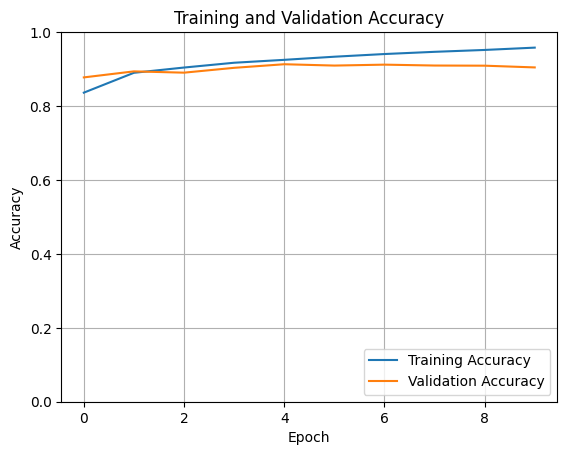

In [37]:
# Menampilkan grafik akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()